# Exploratory Data Analysis Notebook

In [306]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from catboost import CatBoostRegressor

In [307]:
df = pd.read_csv('data/jobs_in_data.csv')
df.head(5)

,work_year,job_title,job_category,salary_currency,salary,salary_in_usd,employee_residence,experience_level,employment_type,work_setting,company_location,company_size
0,2023,Data DevOps Engineer,Data Engineering,EUR,88000,95012,Germany,Mid-level,Full-time,Hybrid,Germany,L
1,2023,Data Architect,Data Architecture and Modeling,USD,186000,186000,United States,Senior,Full-time,In-person,United States,M
2,2023,Data Architect,Data Architecture and Modeling,USD,81800,81800,United States,Senior,Full-time,In-person,United States,M
3,2023,Data Scientist,Data Science and Research,USD,212000,212000,United States,Senior,Full-time,In-person,United States,M
4,2023,Data Scientist,Data Science and Research,USD,93300,93300,United States,Senior,Full-time,In-person,United States,M


In [308]:
df.shape

(9355, 12)

In [309]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9355 entries, 0 to 9354
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           9355 non-null   int64 
 1   job_title           9355 non-null   object
 2   job_category        9355 non-null   object
 3   salary_currency     9355 non-null   object
 4   salary              9355 non-null   int64 
 5   salary_in_usd       9355 non-null   int64 
 6   employee_residence  9355 non-null   object
 7   experience_level    9355 non-null   object
 8   employment_type     9355 non-null   object
 9   work_setting        9355 non-null   object
 10  company_location    9355 non-null   object
 11  company_size        9355 non-null   object
dtypes: int64(3), object(9)
memory usage: 877.2+ KB


In [310]:
df.duplicated().sum()

4014

Clearly we have a lot of duplicates, so let's drop them 

In [311]:
df.drop_duplicates(inplace=True)
df.reset_index(drop=True, inplace=True)

Let's take a look at our categorical variables:

In [312]:
job_title_counts = df['job_title'].value_counts()
print(job_title_counts)
company_location_counts = df['company_location'].value_counts()
print(company_location_counts)


job_title
Data Engineer                    1100
Data Scientist                   1039
Data Analyst                      744
Machine Learning Engineer         518
Analytics Engineer                207
                                 ... 
Deep Learning Researcher            1
Analytics Engineering Manager       1
BI Data Engineer                    1
Power BI Developer                  1
Marketing Data Engineer             1
Name: count, Length: 125, dtype: int64
company_location
United States     4301
United Kingdom     358
Canada             198
Germany             71
Spain               59
                  ... 
Gibraltar            1
Ecuador              1
Andorra              1
Mauritius            1
Malta                1
Name: count, Length: 70, dtype: int64


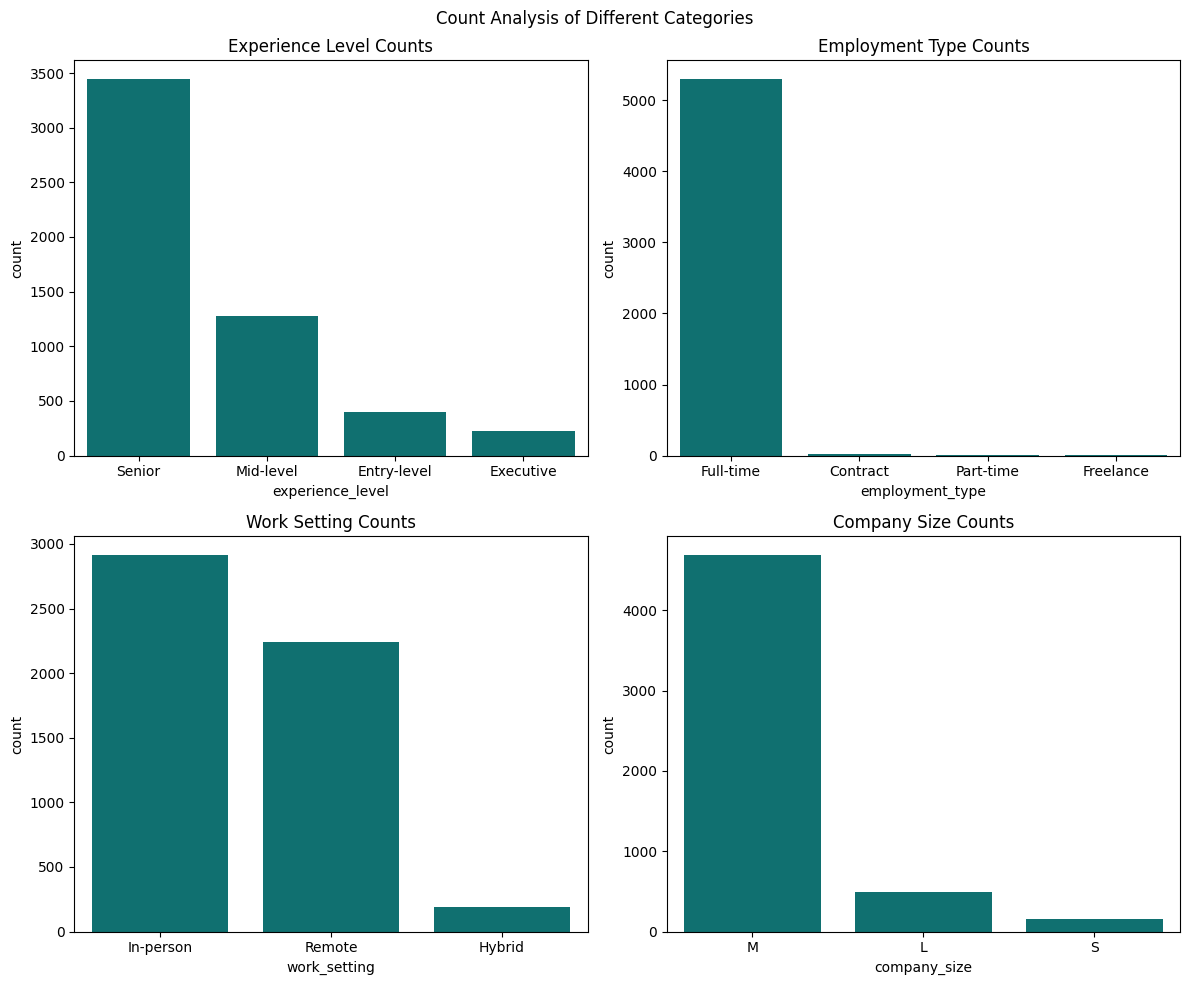

In [313]:
fig, axes = plt.subplots(2, 2, figsize=(12, 10))
fig.suptitle('Count Analysis of Different Categories')

sns.countplot(ax=axes[0, 0], x='experience_level', data=df, color="teal", 
              order=df['experience_level'].value_counts().index)
axes[0, 0].set_title('Experience Level Counts')

sns.countplot(ax=axes[0, 1], x='employment_type', data=df, color="teal", 
              order=df['employment_type'].value_counts().index)
axes[0, 1].set_title('Employment Type Counts')

sns.countplot(ax=axes[1, 0], x='work_setting', data=df, color="teal", 
              order=df['work_setting'].value_counts().index)
axes[1, 0].set_title('Work Setting Counts')

sns.countplot(ax=axes[1, 1], x='company_size', data=df, color="teal", 
              order=df['company_size'].value_counts().index)
axes[1, 1].set_title('Company Size Counts')

plt.tight_layout()
plt.show()

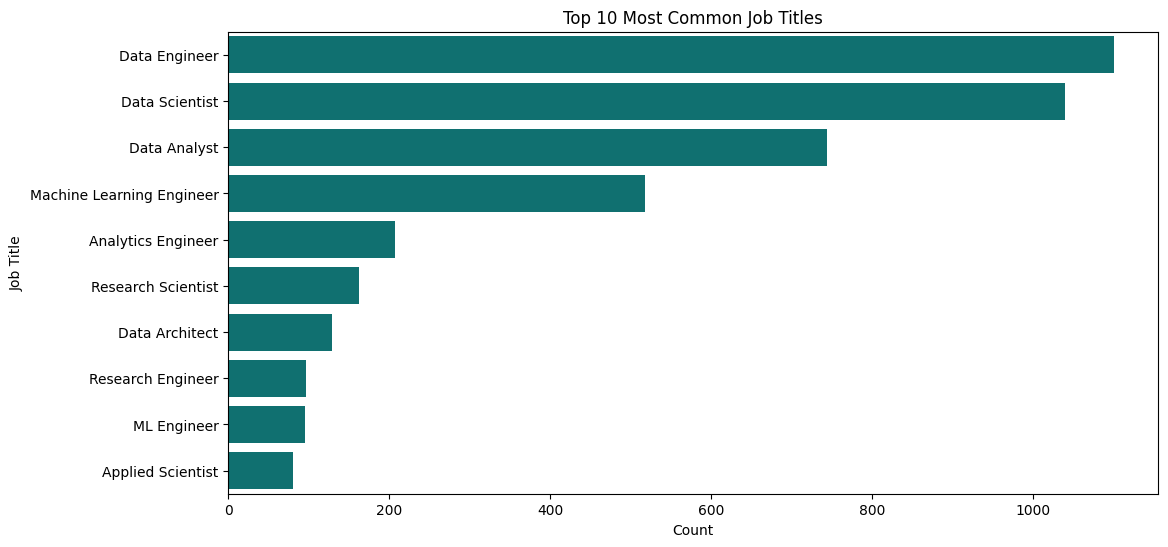

In [314]:
# Getting the top 10 most common job titles
top_job_titles = df['job_title'].value_counts().head(10)

plt.figure(figsize=(12, 6))
sns.barplot(x=top_job_titles.values, y=top_job_titles.index, color="teal")
plt.title('Top 10 Most Common Job Titles')
plt.xlabel('Count')
plt.ylabel('Job Title')
plt.show()



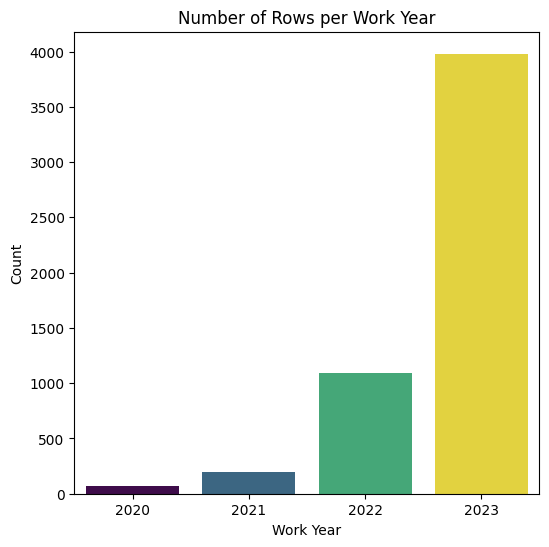

In [315]:
plt.figure(figsize=(6, 6))
sns.countplot(data=df, x='work_year', hue='work_year', palette='viridis', legend=False)
plt.title('Number of Rows per Work Year')
plt.xlabel('Work Year')
plt.ylabel('Count')
plt.show()

let's look at our numerical variables:

In [316]:
df.describe()

,work_year,salary,salary_in_usd
count,5341.000000,5341.000000,5341.000000
mean,2022.682082,145814.937839,146258.409099
std,0.608026,67025.469452,66594.117529
min,2020.000000,14000.000000,15000.000000
25%,2022.000000,97300.000000,98506.000000
50%,2023.000000,140000.000000,140000.000000
75%,2023.000000,186200.000000,186000.000000
max,2023.000000,450000.000000,450000.000000


Let's explore our label - salary_in_usd

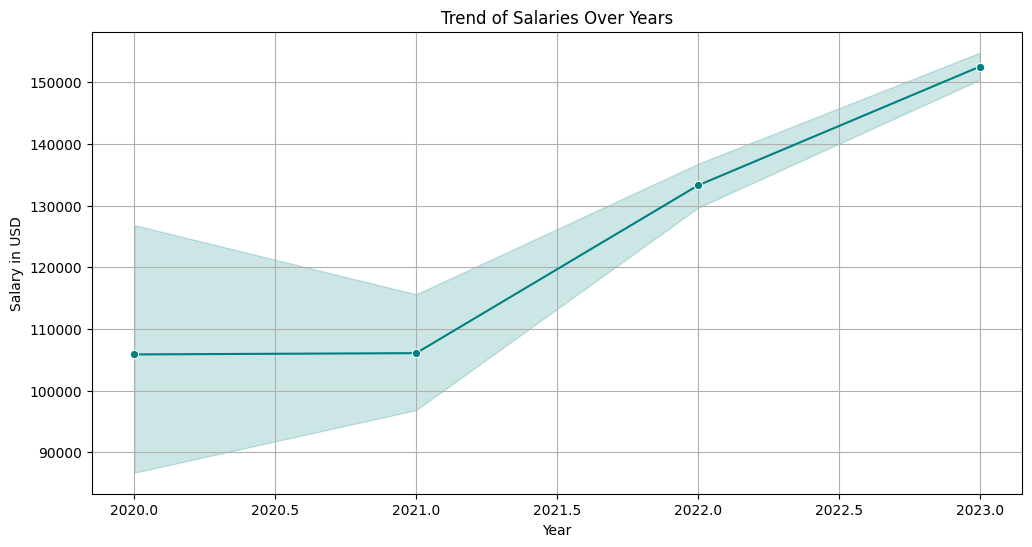

In [317]:
# Plotting time series trends of salaries over the years
plt.figure(figsize=(12, 6))
sns.lineplot(data=df, x='work_year', y='salary_in_usd', marker='o', color="teal")
plt.title('Trend of Salaries Over Years')
plt.xlabel('Year')
plt.ylabel('Salary in USD')
plt.grid(True)
plt.show()

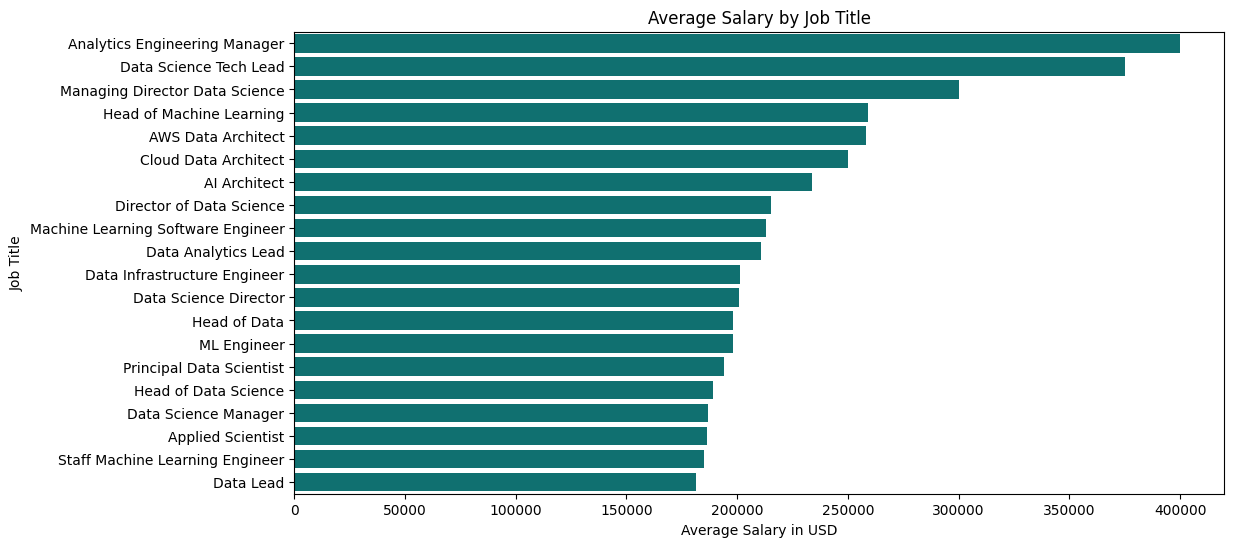

In [318]:
avg_salary_by_title = df.groupby('job_title')['salary_in_usd'].mean().sort_values(ascending=False).head(20)

plt.figure(figsize=(12, 6))
sns.barplot(x=avg_salary_by_title.values, y=avg_salary_by_title.index, color="teal")
plt.title('Average Salary by Job Title')
plt.xlabel('Average Salary in USD')
plt.ylabel('Job Title')
plt.show()

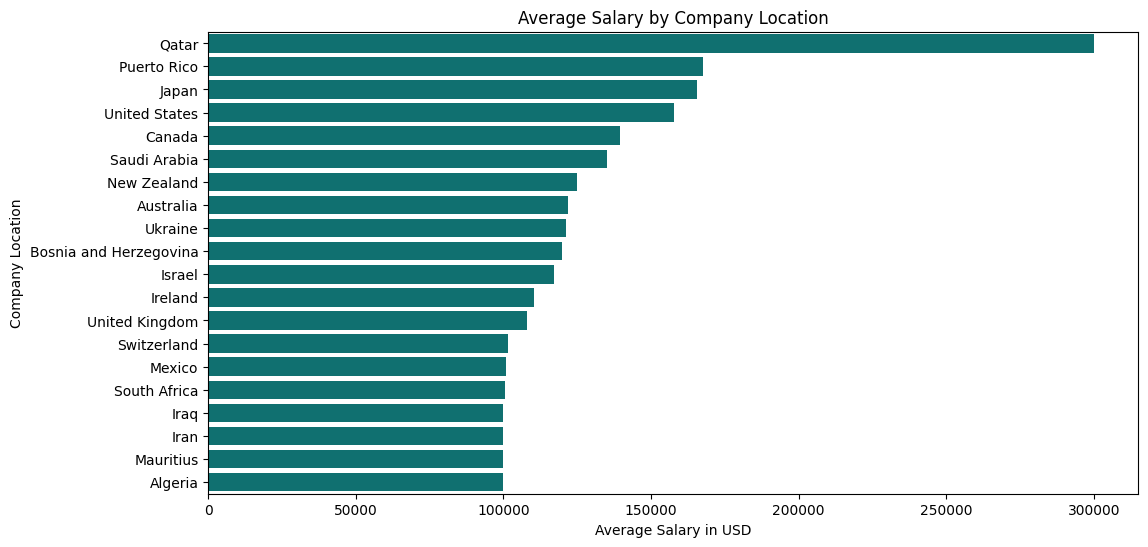

In [319]:
avg_salary_by_title = df.groupby('company_location')['salary_in_usd'].mean().sort_values(ascending=False).head(20)

plt.figure(figsize=(12, 6))
sns.barplot(x=avg_salary_by_title.values, y=avg_salary_by_title.index, color="teal")
plt.title('Average Salary by Company Location')
plt.xlabel('Average Salary in USD')
plt.ylabel('Company Location')
plt.show()

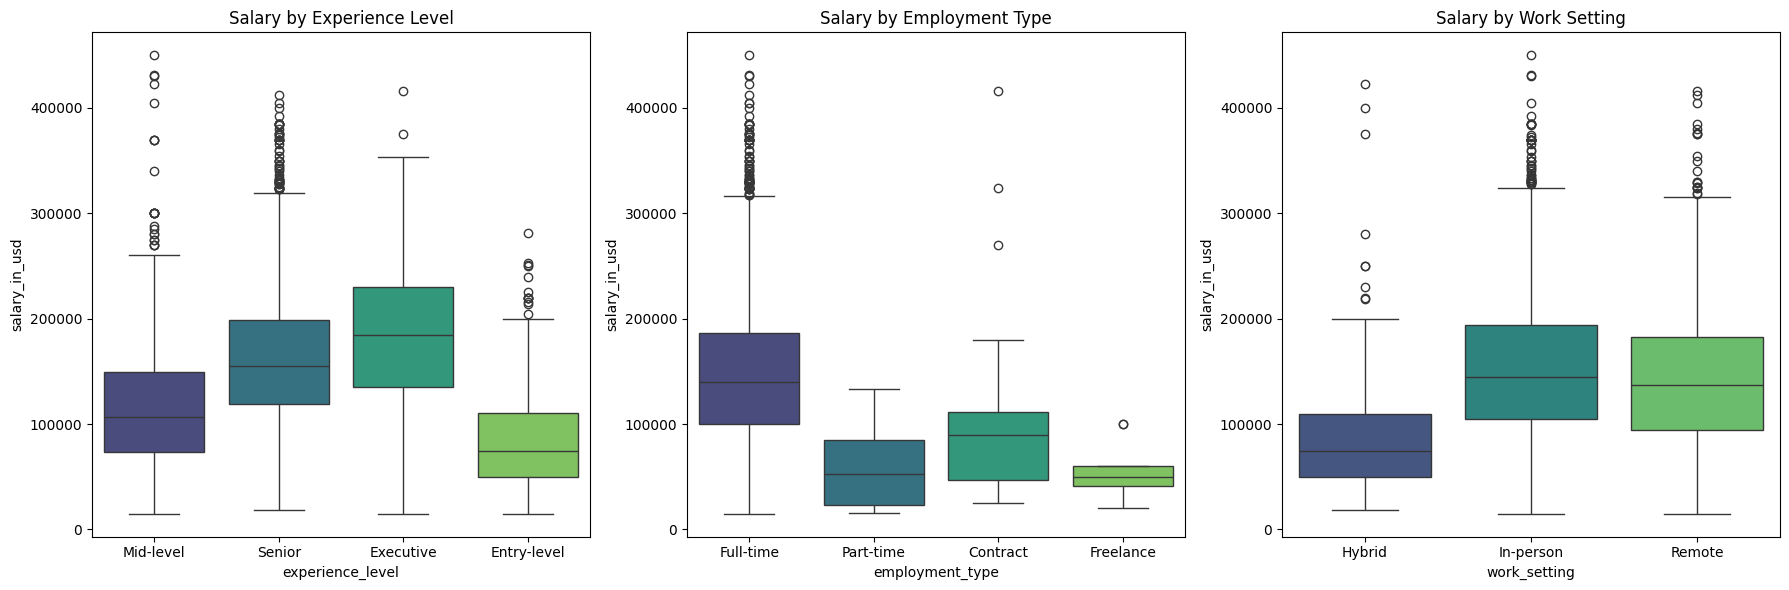

In [320]:
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

sns.boxplot(ax=axes[0], x='experience_level', hue='experience_level', y='salary_in_usd', data=df, palette="viridis", legend=False)
axes[0].set_title('Salary by Experience Level')

sns.boxplot(ax=axes[1], x='employment_type', hue='employment_type', y='salary_in_usd', data=df, palette="viridis", legend=False)
axes[1].set_title('Salary by Employment Type')

sns.boxplot(ax=axes[2], x='work_setting', hue='work_setting', y='salary_in_usd', data=df, palette="viridis", legend=False)
axes[2].set_title('Salary by Work Setting')

plt.tight_layout()
plt.show()

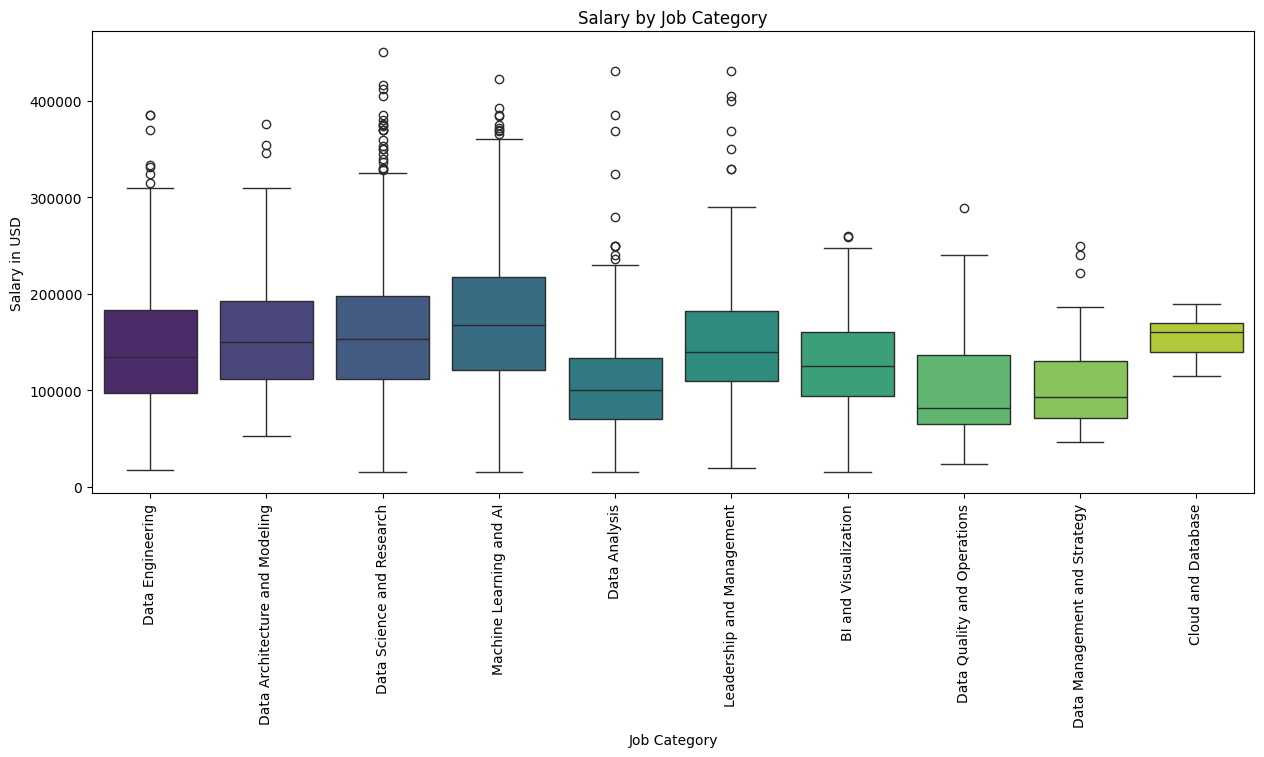

In [321]:
plt.figure(figsize=(15, 6))
sns.boxplot(x='job_category', hue='job_category', y='salary_in_usd', data=df, palette="viridis", legend=False)
plt.title('Salary by Job Category')
plt.xticks(rotation=90)
plt.xlabel('Job Category')
plt.ylabel('Salary in USD')
plt.show()

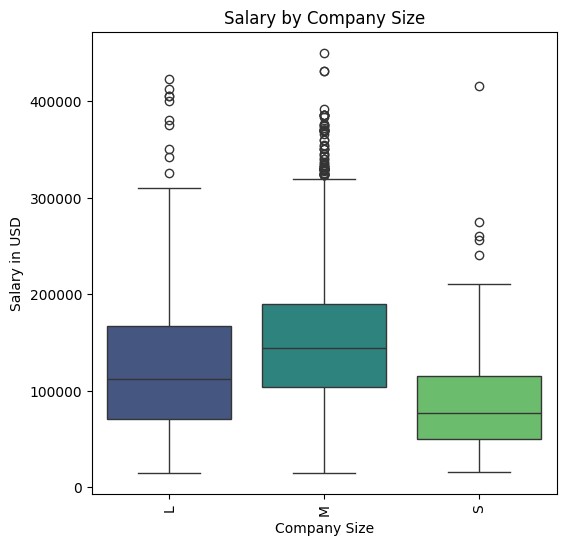

In [322]:
plt.figure(figsize=(6, 6))
sns.boxplot(x='company_size', hue='company_size', y='salary_in_usd', data=df, palette="viridis", legend=False)
plt.title('Salary by Company Size')
plt.xticks(rotation=90)
plt.xlabel('Company Size')
plt.ylabel('Salary in USD')
plt.show()

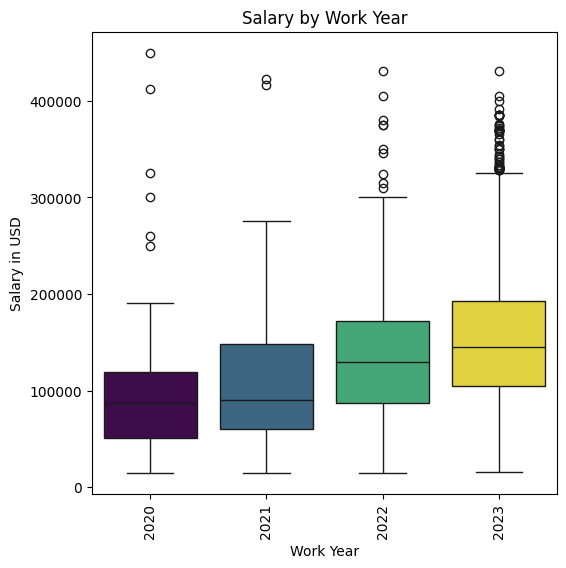

In [323]:
plt.figure(figsize=(6, 6))
sns.boxplot(x='work_year', hue='work_year', y='salary_in_usd', data=df, palette="viridis", legend=False)
plt.title('Salary by Work Year')
plt.xticks(rotation=90)
plt.xlabel('Work Year')
plt.ylabel('Salary in USD')
plt.show()

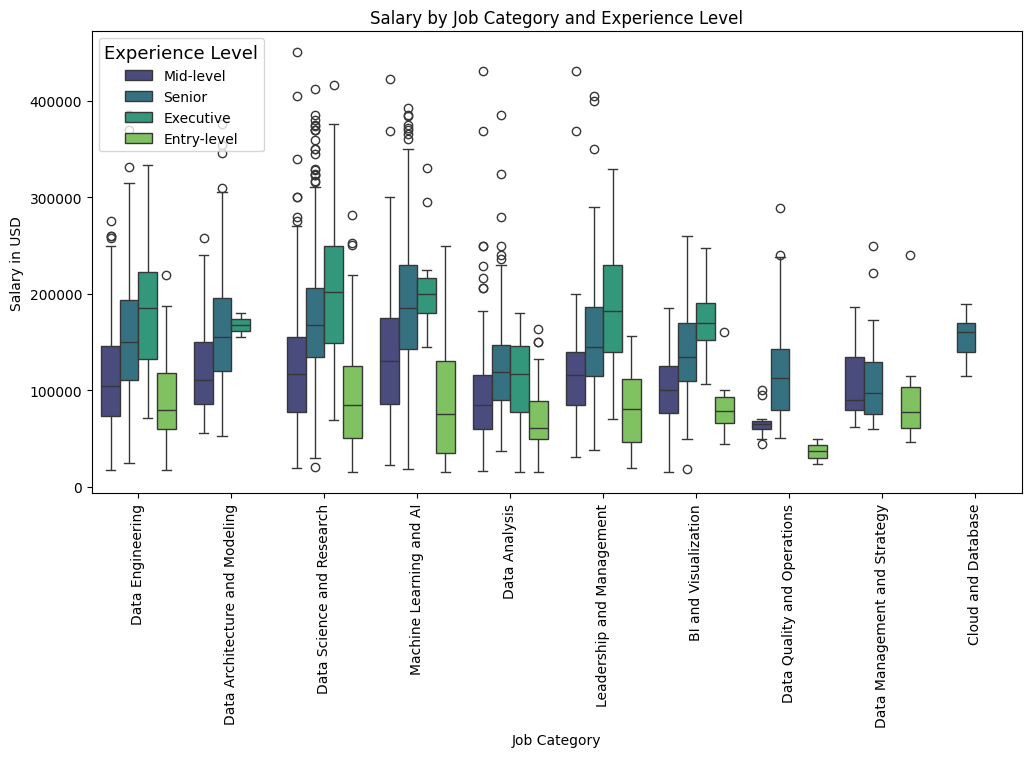

In [324]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='job_category', y='salary_in_usd', hue='experience_level', data=df, palette="viridis")
plt.title('Salary by Job Category and Experience Level')
plt.xlabel('Job Category')
plt.ylabel('Salary in USD')
plt.legend(title='Experience Level', title_fontsize='13', loc='upper left')
plt.xticks(rotation=90)
plt.show()


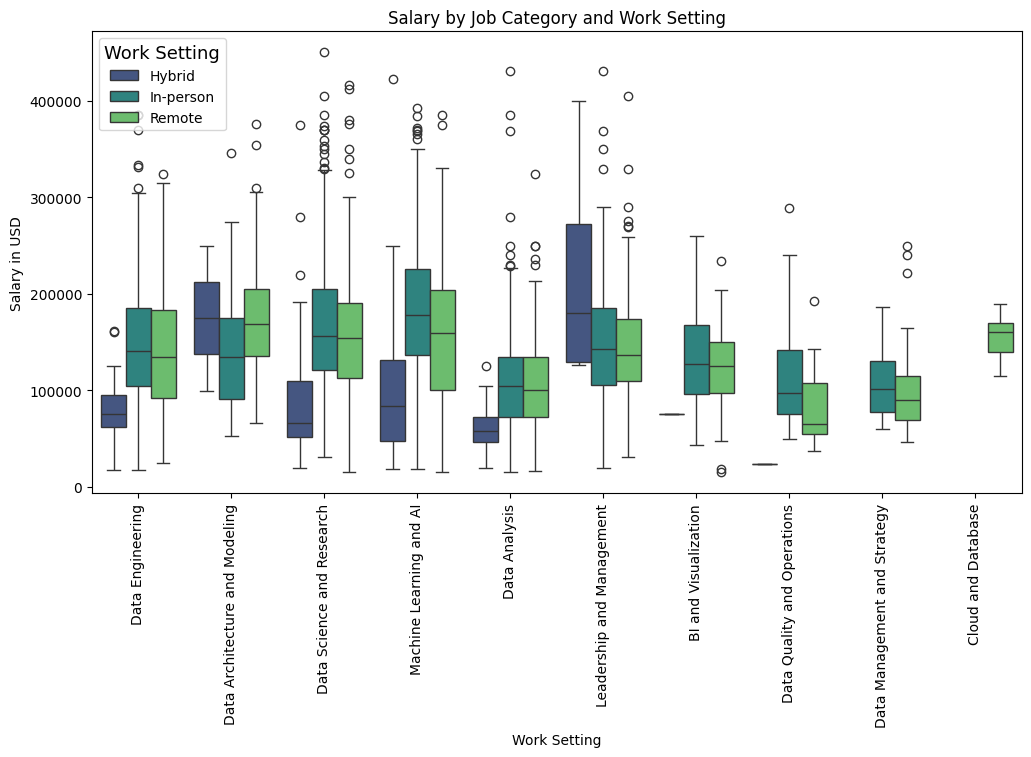

In [325]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='job_category', y='salary_in_usd', hue='work_setting', data=df, palette="viridis")
plt.title('Salary by Job Category and Work Setting')
plt.xlabel('Work Setting')
plt.ylabel('Salary in USD')
plt.legend(title='Work Setting', title_fontsize='13', loc='upper left')
plt.xticks(rotation=90)
plt.show()


Looking for outliers:

he Z-score measures how many standard deviations a data point is away from the mean. Typically, data points with a Z-score beyond a certain threshold (e.g., 2 or 3 standard deviations) are considered outliers.


In [326]:
from scipy import stats
import numpy as np

# Calculate Z-scores for 'salary_in_usd'
z_scores = stats.zscore(df['salary_in_usd'])

# Define a threshold (e.g., 3 standard deviations)
threshold = 3

# Find the indices of outliers
outlier_indices = np.where(np.abs(z_scores) > threshold)

# Filter the DataFrame to get rows with outliers
outliers = df.iloc[outlier_indices].sort_values(by='salary_in_usd', ascending=False)
outliers.head(10)


,work_year,job_title,job_category,salary_currency,salary,salary_in_usd,employee_residence,experience_level,employment_type,work_setting,company_location,company_size
5145,2020,Research Scientist,Data Science and Research,USD,450000,450000,United States,Mid-level,Full-time,In-person,United States,M
4180,2022,Data Analyst,Data Analysis,GBP,350000,430967,United Kingdom,Mid-level,Full-time,In-person,United Kingdom,M
3286,2023,Analytics Engineer,Leadership and Management,GBP,350000,430640,United Kingdom,Mid-level,Full-time,In-person,United Kingdom,M
5334,2021,Applied Machine Learning Scientist,Machine Learning and AI,USD,423000,423000,United States,Mid-level,Full-time,Hybrid,United States,L
5274,2021,Principal Data Scientist,Data Science and Research,USD,416000,416000,United States,Executive,Contract,Remote,United States,S
5337,2020,Data Scientist,Data Science and Research,USD,412000,412000,United States,Senior,Full-time,Remote,United States,L
5091,2022,Data Analytics Lead,Leadership and Management,USD,405000,405000,United States,Senior,Full-time,Remote,United States,L
1256,2023,Research Scientist,Data Science and Research,USD,405000,405000,United States,Mid-level,Full-time,In-person,United States,L
2929,2023,Analytics Engineering Manager,Leadership and Management,GBP,325000,399880,United Kingdom,Senior,Full-time,Hybrid,United Kingdom,L
2633,2023,Machine Learning Engineer,Machine Learning and AI,USD,392000,392000,United States,Senior,Full-time,In-person,United States,M


We can see that 63 rows from our dataset is 3 standard deviations away from mean. Let's drop them.

In [327]:
df.drop(outliers.index, inplace=True)


Let's plot Salary by Work Year again. Should look better after ourliers cleaning.

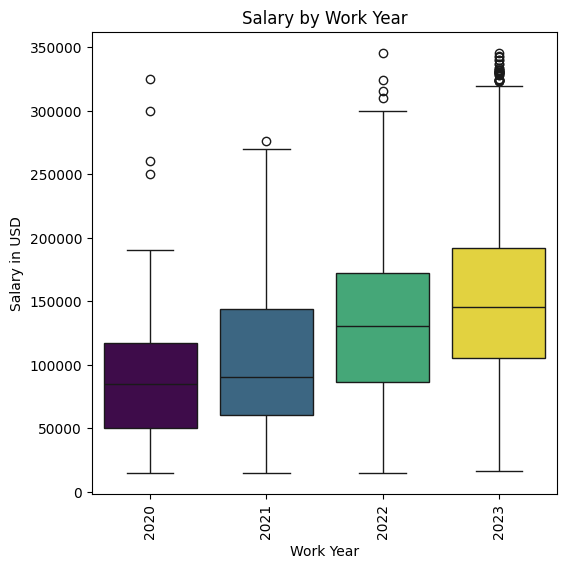

In [328]:
plt.figure(figsize=(6, 6))
sns.boxplot(x='work_year', hue='work_year', y='salary_in_usd', data=df, palette="viridis", legend=False)
plt.title('Salary by Work Year')
plt.xticks(rotation=90)
plt.xlabel('Work Year')
plt.ylabel('Salary in USD')
plt.show()

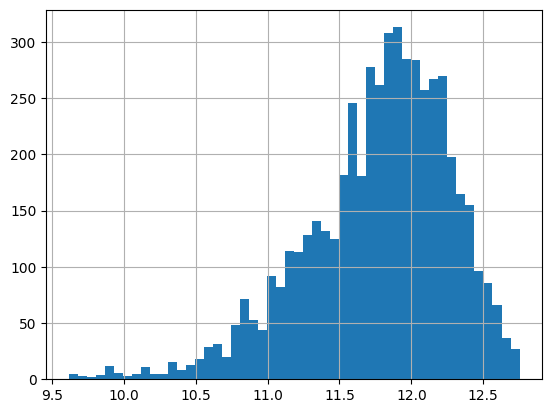

In [329]:
np.log1p(df["salary_in_usd"]).hist(bins=50)
plt.show(block=True)

## Feature Extraction

In [330]:
# Replace countries not in the top 10 with 'Rare'
top_employee_10_countries = df['employee_residence'].value_counts().nlargest(10).index.tolist()
top_company_10_countries = df['company_location'].value_counts().nlargest(10).index.tolist()
df['employee_residence'] = df['employee_residence'].apply(lambda x: x if x in top_employee_10_countries else 'Rare')
df['company_location'] = df['company_location'].apply(lambda x: x if x in top_company_10_countries else 'Rare')
df
# Splitting the dataset into 70% train, 15% validation, and 15% test
train, temp = train_test_split(df, test_size=0.3, random_state=42)
val, test = train_test_split(temp, test_size=0.5, random_state=42)

# Label Encoder
label_encoder = LabelEncoder()
train['work_year'] = label_encoder.fit_transform(train['work_year'])
val['work_year'] = label_encoder.transform(val['work_year'])
test['work_year'] = label_encoder.transform(test['work_year'])

# One Hot Encoder
categorical_cols = ['job_category', 'employee_residence', 'experience_level', 
                    'employment_type', 'work_setting', 'company_location', 'company_size']

one_hot_encoder = OneHotEncoder()
encoded_columns = one_hot_encoder.fit_transform(train[categorical_cols]).toarray()
encoded_col_names = one_hot_encoder.get_feature_names_out(categorical_cols)
encoded_df = pd.DataFrame(encoded_columns, columns=encoded_col_names, index=train.index)
train = pd.concat([train, encoded_df], axis=1)

encoded_val_columns = one_hot_encoder.transform(val[categorical_cols]).toarray()
encoded_val_col_names = one_hot_encoder.get_feature_names_out(categorical_cols)
encoded_val = pd.DataFrame(encoded_val_columns, columns=encoded_val_col_names, index=val.index)
val = pd.concat([val, encoded_val], axis=1)

encoded_test_columns = one_hot_encoder.transform(test[categorical_cols]).toarray()
encoded_test_col_names = one_hot_encoder.get_feature_names_out(categorical_cols)
encoded_test = pd.DataFrame(encoded_test_columns, columns=encoded_test_col_names, index=test.index)
test = pd.concat([test, encoded_test], axis=1)

train.drop(columns=['job_title', 'salary_currency', 'salary','job_category', 'employee_residence', 'experience_level', 'employment_type',
                    "work_setting", 'company_location','salary', 'company_size'], axis=1, inplace=True )
val.drop(columns=['job_title', 'salary_currency','salary',  'job_category', 'employee_residence', 'experience_level', 'employment_type',
                    "work_setting", 'company_location', 'company_size'], axis=1, inplace=True )
test.drop(columns=['job_title', 'salary_currency','salary',  'job_category', 'employee_residence', 'experience_level', 'employment_type',
                    "work_setting", 'company_location', 'company_size'], axis=1, inplace=True )

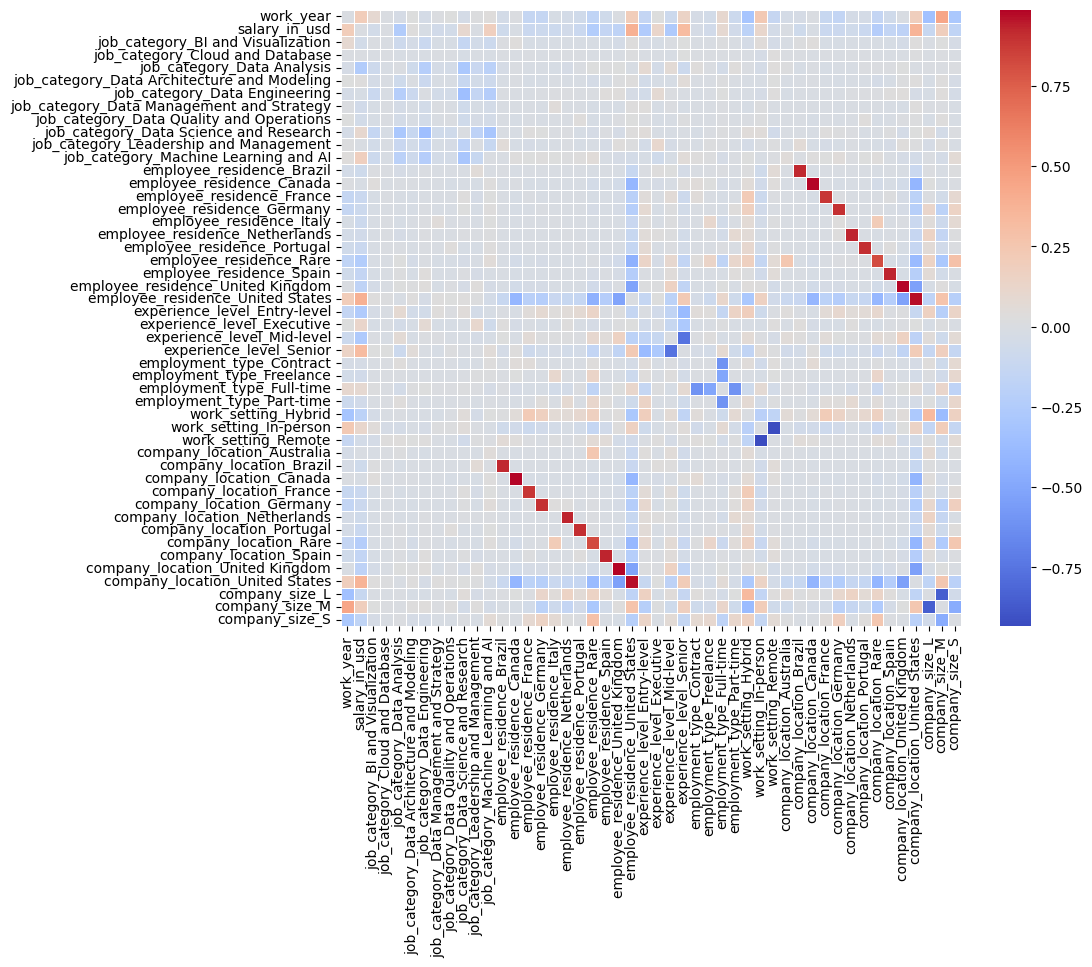

In [338]:
corr = train.corr()

# Set up the matplotlib figure
plt.figure(figsize=(10, 8))

np.fill_diagonal(corr.values, 0)

# Draw the heatmap
sns.heatmap(corr, 
            xticklabels=corr.columns,
            yticklabels=corr.columns,
            cmap='coolwarm',    # You can choose different colormaps like 'viridis', 'plasma', etc.
            annot=False,        # Set to True if you want to display correlation coefficients
            linewidths=.5)

# Show the plot
plt.show()

## Features importance

In [331]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, mean_absolute_percentage_error
def print_metrics(model, X_train, y_train, X_val, y_val):
    
    y_pred_val = model.predict(X_val)
    y_pred_train = model.predict(X_train)

    # Calculate R-squared and Mean Squared Error
    r_squared_val = r2_score(np.expm1(y_val), np.expm1(y_pred_val))  # Inverse log transform to get the actual values
    mse_val = mean_squared_error(np.expm1(y_val), np.expm1(y_pred_val))  # Inverse log transform to get the actual values
    mae = mean_absolute_error(np.expm1(y_val), np.expm1(y_pred_val))
    mape = mean_absolute_percentage_error(np.expm1(y_val), np.expm1(y_pred_val))

    mae_train = mean_absolute_error(np.expm1(y_train), np.expm1(y_pred_train))
    mape_train = mean_absolute_percentage_error(np.expm1(y_train), np.expm1(y_pred_train))

    print(f"Mean Absolute Error (Train): {mae_train:.2f}")
    print(f"Mean Absolute Error Percentage (Train): {mape_train:.2f}")
    print("--------------------------------------")

    print(f"R-squared (Validation): {r_squared_val:.2f}")
    print(f"Mean Squared Error (Validation): {mse_val:.2f}")
    print(f"Mean Absolute Error (Validation): {mae:.2f}")
    print(f"Mean Absolute Error Percentage (Validation): {mape:.2f}")

LinearRegression
Mean Absolute Error (Train): 39035.08
Mean Absolute Error Percentage (Train): 0.31
--------------------------------------
R-squared (Validation): 0.41
Mean Squared Error (Validation): 2522260452.23
Mean Absolute Error (Validation): 38619.69
Mean Absolute Error Percentage (Validation): 0.31



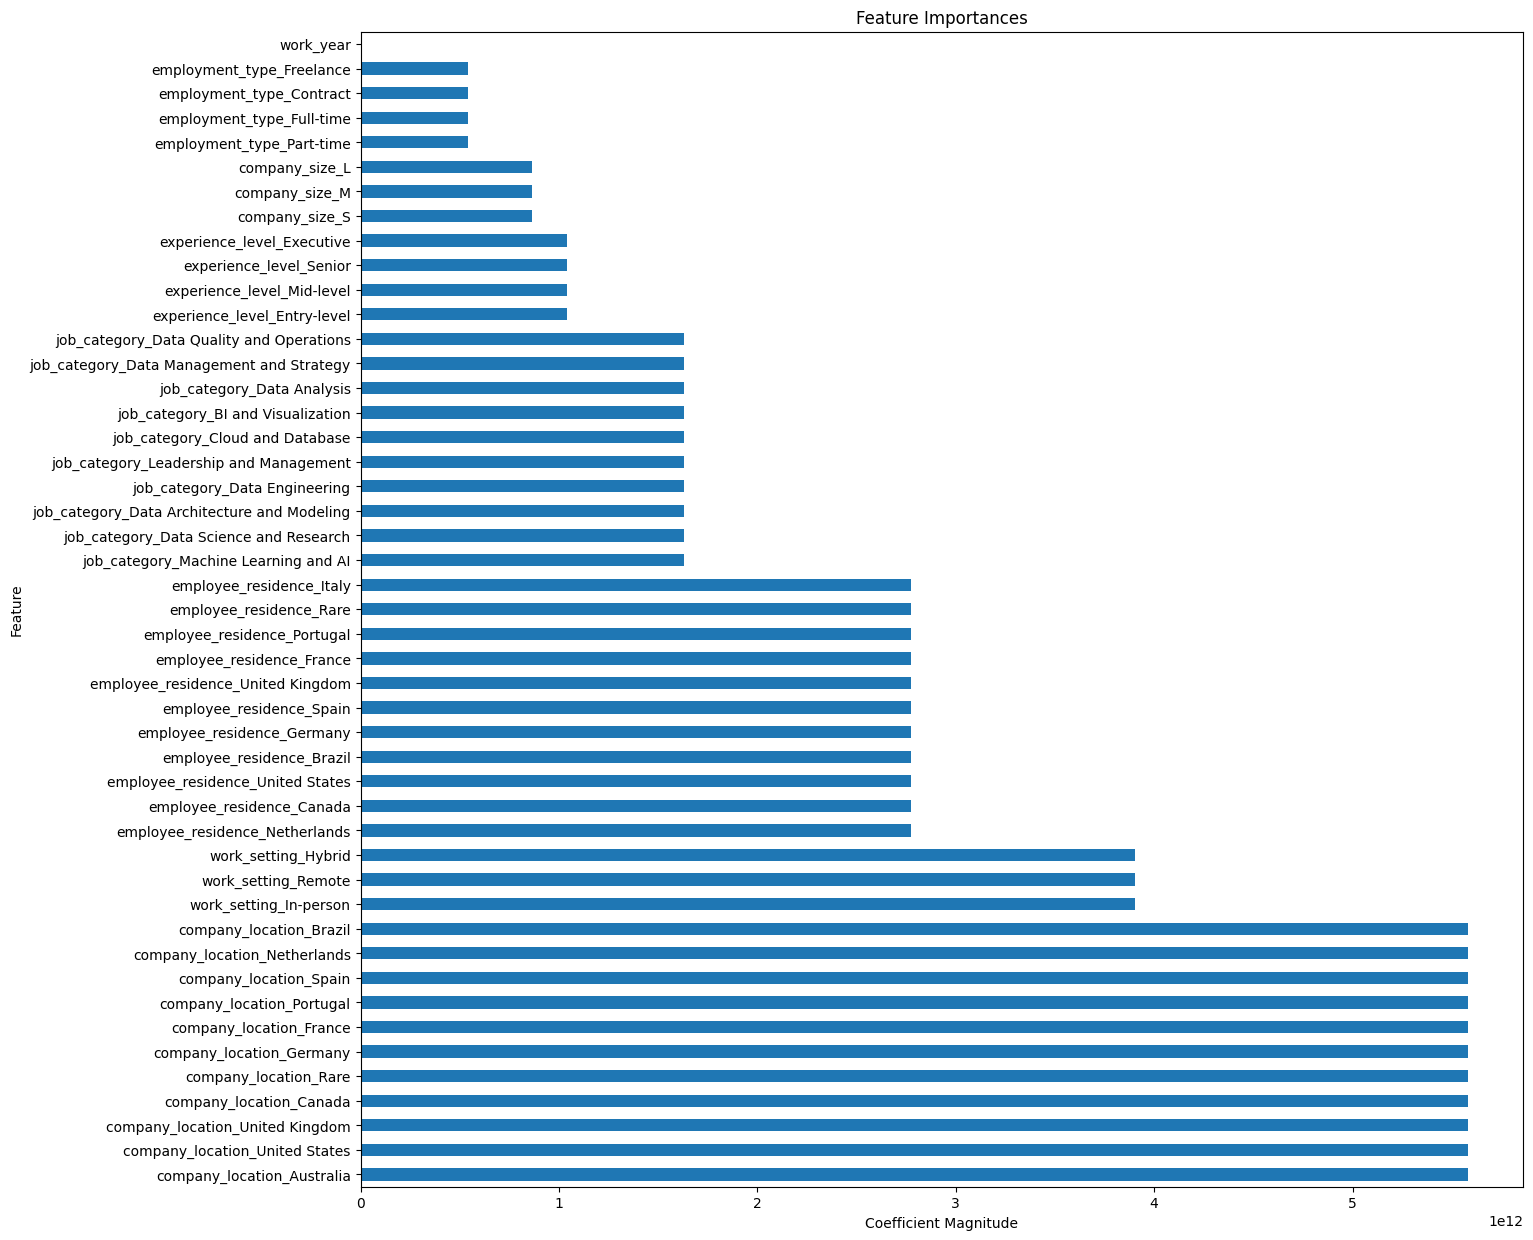

In [358]:
X_train = train.drop(['salary_in_usd'], axis=1)  # drop the target variable
y_train = np.log1p(train['salary_in_usd'])
X_val = val.drop(['salary_in_usd'], axis=1)  # drop the target variable
y_val = np.log1p(val['salary_in_usd'])

lr = LinearRegression()
lr.fit(X_train, y_train)
print("LinearRegression")
print_metrics(lr, X_train, y_train, X_val, y_val)
print("")

coefficients = lr.coef_

# Create a DataFrame for easy plotting
feature_importance = pd.DataFrame(coefficients, index=X_train.columns, columns=["Importance"])
feature_importance["Absolute Importance"] = feature_importance["Importance"].abs()
feature_importance = feature_importance.sort_values(by="Absolute Importance", ascending=False)


plt.figure(figsize=(15, 15))
feature_importance['Absolute Importance'].plot(kind='barh')
plt.title('Feature Importances')
plt.xlabel('Coefficient Magnitude')
plt.ylabel('Feature')
plt.show()

RandomForestRegressor
Mean Absolute Error (Train): 35566.17
Mean Absolute Error Percentage (Train): 0.27
--------------------------------------
R-squared (Validation): 0.40
Mean Squared Error (Validation): 2591360997.13
Mean Absolute Error (Validation): 39800.59
Mean Absolute Error Percentage (Validation): 0.32



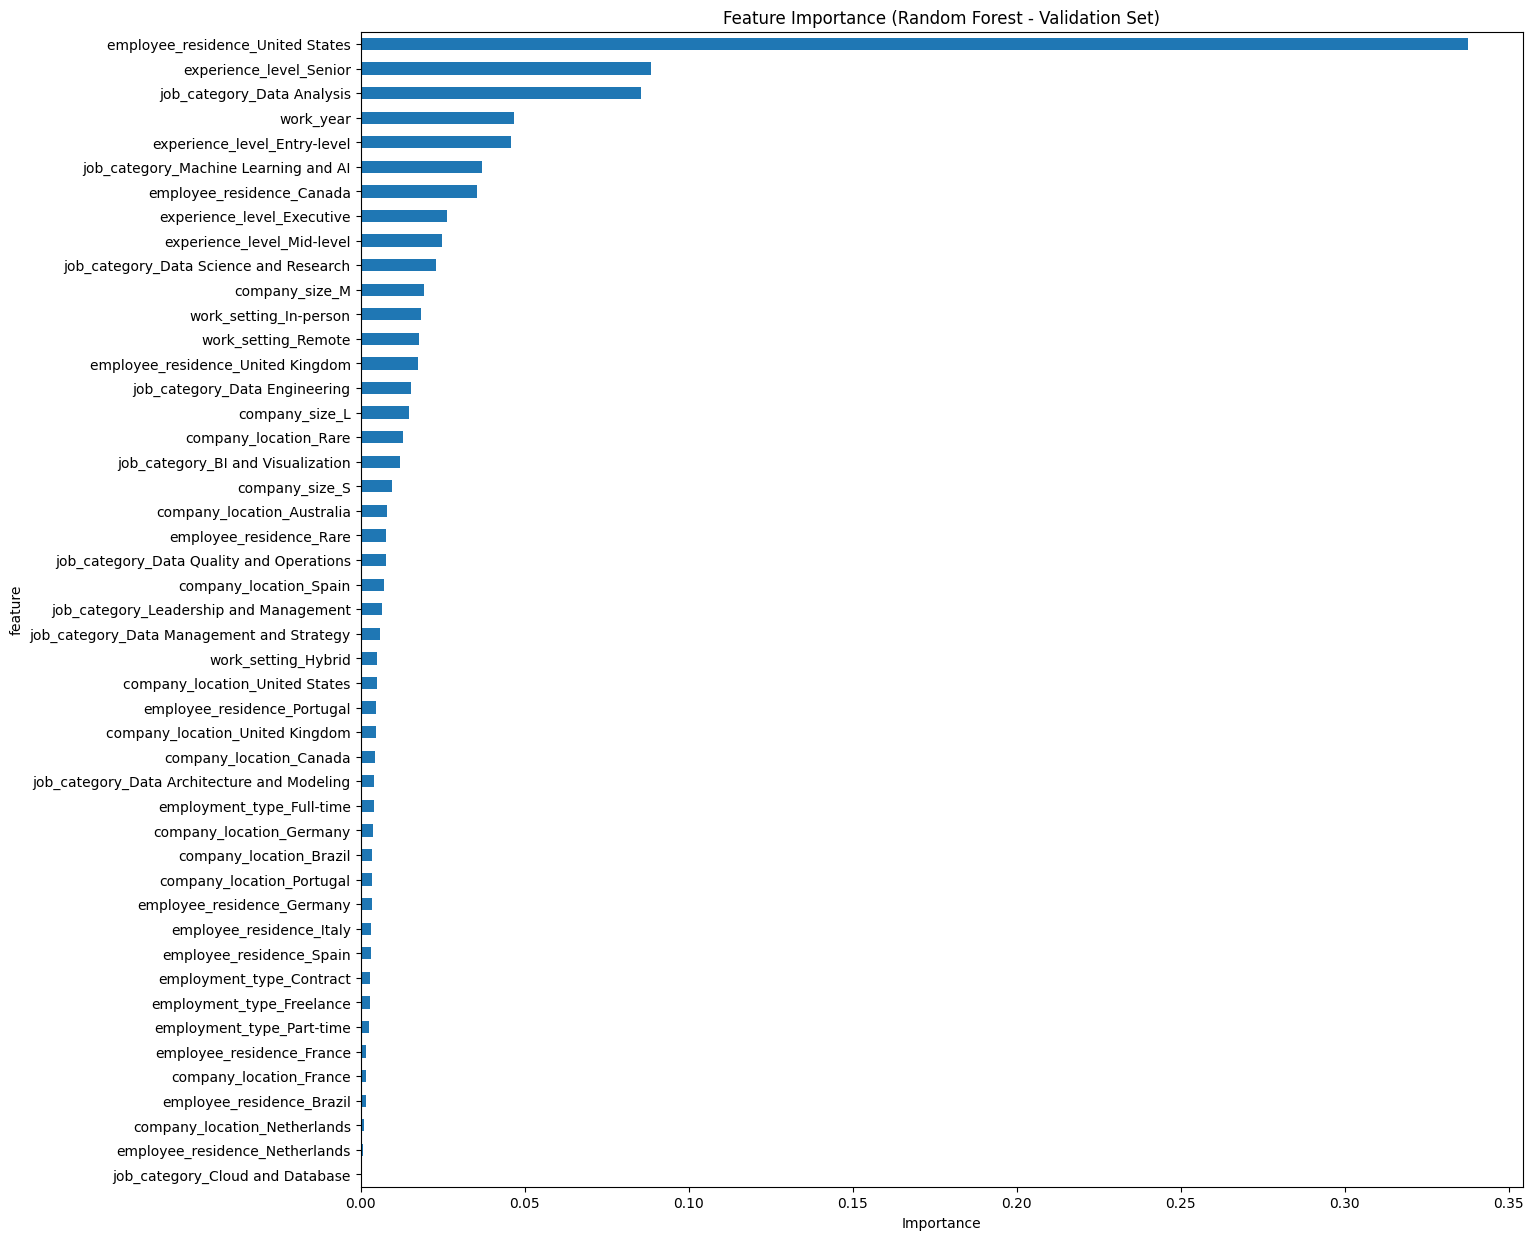

In [357]:
rf_reg = RandomForestRegressor(random_state=42)
rf_reg.fit(X_train, y_train)
print("RandomForestRegressor")
print_metrics(rf_reg, X_train, y_train, X_val, y_val)
print("")

importance_val_rf = rf_reg.feature_importances_
feature_importance_val_rf = pd.DataFrame({'feature': X_train.columns, 'importance': importance_val_rf})
feature_importance_val_rf.sort_values(by='importance', ascending=True, inplace=True)

# Plot Feature Importance for Random Forest
plt.figure(figsize=(15, 15))
feature_importance_val_rf.set_index('feature')['importance'].plot(kind='barh')
plt.title('Feature Importance (Random Forest - Validation Set)')
plt.xlabel('Importance')
plt.show()

CatBoostRegressor
Mean Absolute Error (Train): 35566.17
Mean Absolute Error Percentage (Train): 0.27
--------------------------------------
R-squared (Validation): 0.40
Mean Squared Error (Validation): 2591360997.13
Mean Absolute Error (Validation): 39800.59
Mean Absolute Error Percentage (Validation): 0.32



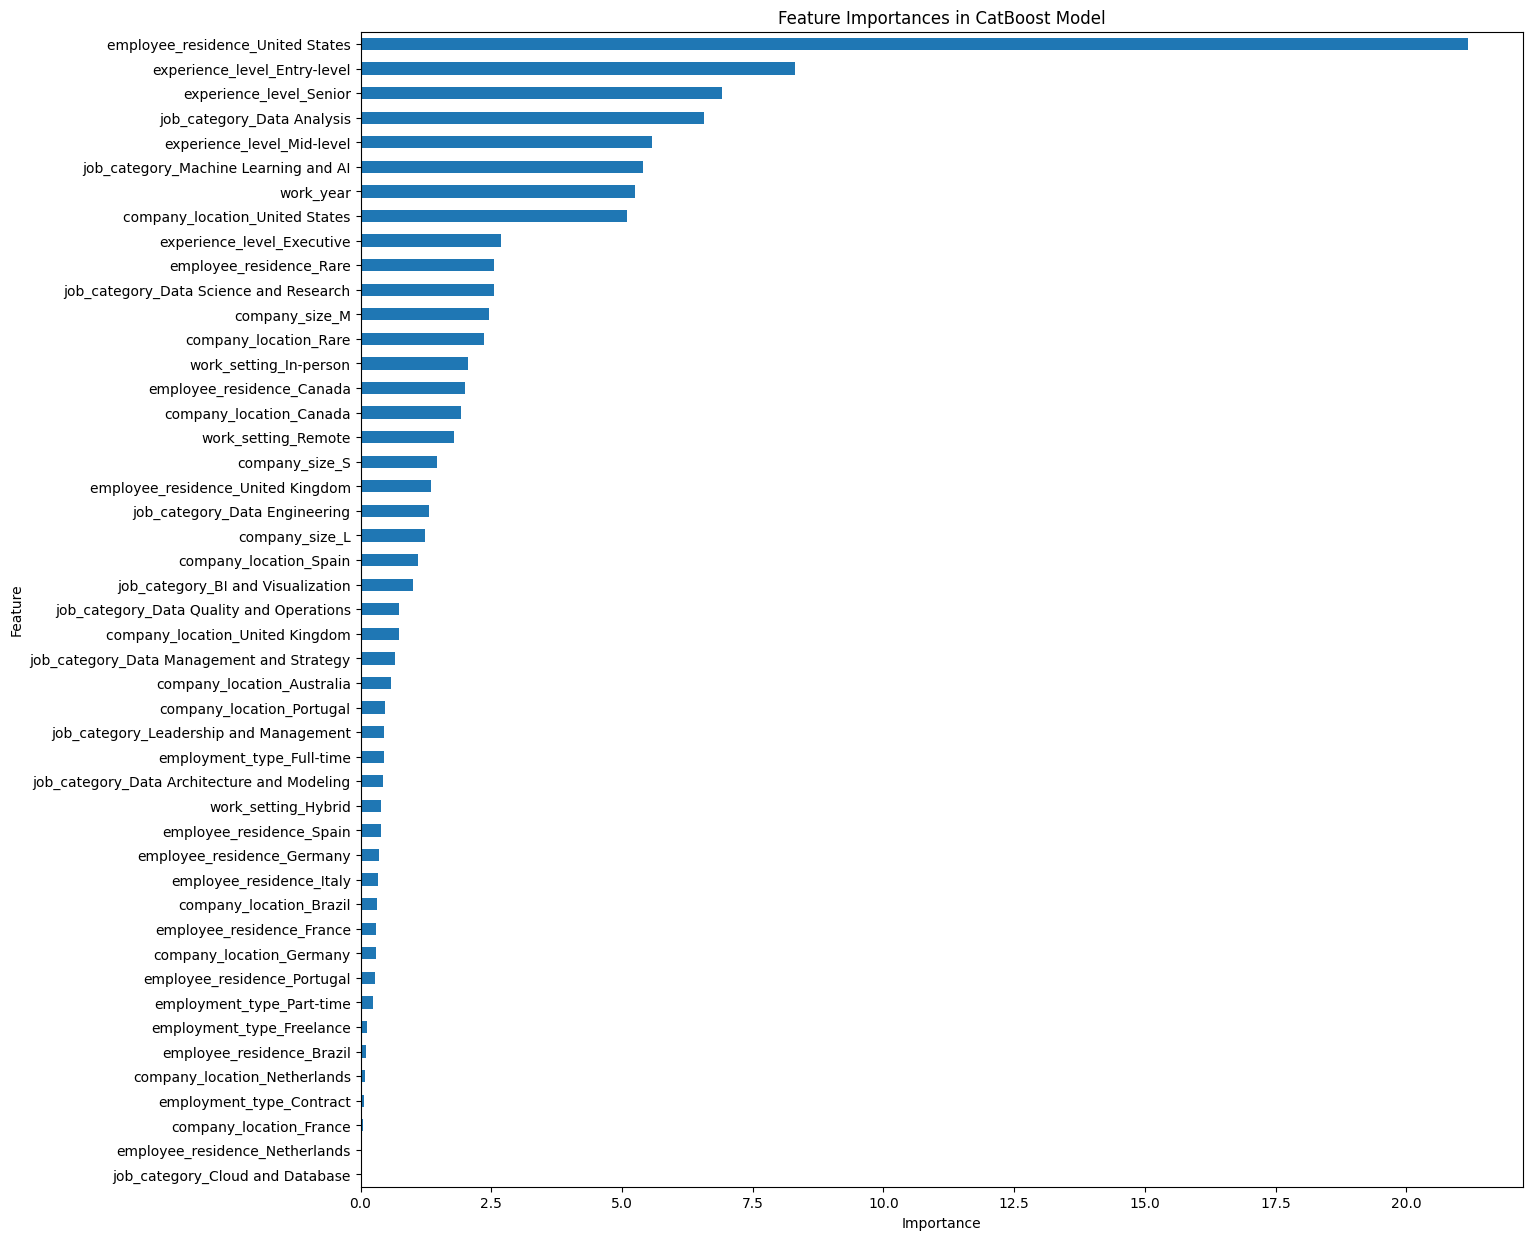

In [356]:
catboost_model = CatBoostRegressor(random_state=42, verbose=False)
catboost_model.set_feature_names(X_train.columns)
catboost_model.fit(X_train, y_train)
print("CatBoostRegressor")
print_metrics(rf_reg, X_train, y_train, X_val, y_val)
print("")

feature_importances = catboost_model.get_feature_importance()

feature_importance_df = pd.DataFrame({
    'Feature': catboost_model.feature_names_,
    'Importance': feature_importances
})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=True)

# Plotting
plt.figure(figsize=(15, 15), dpi=100) 
#feature_importance_df.plot(kind='barh')
feature_importance_df.set_index('Feature')['Importance'].plot(kind='barh')
plt.title('Feature Importances in CatBoost Model')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()